# Detecting COVID-19 & Viral Pneumonia in X-Ray Images

Dataset from: https://www.kaggle.com/tawsifurrahman/covid19-radiography-database?


Also using COVID-19 X-Rays from https://www.kaggle.com/nabeelsajid917/covid-19-x-ray-10000-images?

# Import Libraries

In [21]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from random import shuffle
import random
import os

# Define Constants

In [22]:
path = 'C:\\Users\\faiza\\COVID-19 Deep Learning\\'

IMAGE_WIDTH = 200
IMAGE_HEIGHT = 200

IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

# Prepare Training Data

In [23]:
directories = ['train']
imageData = []
categories = []
    
files = os.listdir(path + directories[0])

for img in files:

    fileName = img.split('.')[0]
    
    if 'NORMAL' in fileName:
        imageData.append([fileName, 0])
        categories.append(0)

    elif 'COVID-19' in fileName:
        imageData.append([fileName, 1])
        categories.append(1)

    else:
        imageData.append([fileName, 2])
        categories.append(2)


fileNames = os.listdir(path + directories[0])

df = pd.DataFrame({
    'filename': fileNames,
    'category': categories
})

In [24]:
df.head()

filename  category
0    COVID-19 (1).png         1
1   COVID-19 (10).png         1
2  COVID-19 (100).png         1
3  COVID-19 (101).png         1
4  COVID-19 (102).png         1

In [25]:
df.tail()

filename  category
695  Viral Pneumonia (95).png         2
696  Viral Pneumonia (96).png         2
697  Viral Pneumonia (97).png         2
698  Viral Pneumonia (98).png         2
699  Viral Pneumonia (99).png         2

# Compare Frequencies 

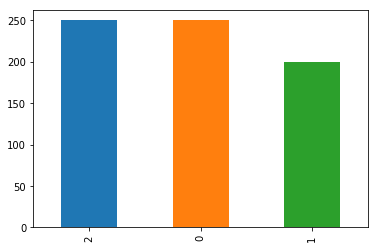

In [26]:
'''
0 Represents Normal 
1 Represents COVID-19
2 Represents Viral Pneumonia 
'''
df['category'].value_counts().plot.bar()

# Load Sample Image

NORMAL (40).png


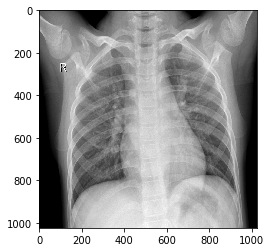

In [8]:
sample = random.choice(os.listdir(path + directories[0]))
image = load_img(path + '\\train\\' + sample)

print(sample)
plt.imshow(image)

# Build Model

1. **Input Layer**: This represents our input image data. It will reshape the image into a single dimensional array. For example, if your image is 64x64, it will convert to (4096,1) array (64x64 = 4096).


2. **Conv Layer**: This layer will extract features from image.


3. **Pooling Layer**: This layer will reduce the spatial volume of input image after convolution.


4. **Fully Connected Layer**: This will connect the network from a layer to another layer


5. **Output Layer**: This is the predicted values layer.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax', name='predictions')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 97, 97, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)      

# Callbacks

## Early Stop

To prevent overfitting, we will stop the learning after 10 epochs and if the val_loss value has not decreased

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

# Learning Rate Reduction

We will reduce the learning rate when then accuracy does not increase for 2 steps

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', 
                                            patience = 2, 
                                            verbose = 1, 
                                            factor = 0.5, 
                                            min_lr = 0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [27]:
df["category"] = df["category"].replace({0: 'Normal', 1: 'COVID-19', 2: 'Viral Pneumonia'}) 

# Shuffle Data

In [28]:
df = df.sample(frac=1).reset_index(drop=True)
df

filename         category
0             NORMAL (123).png           Normal
1     Viral Pneumonia (49).png  Viral Pneumonia
2    Viral Pneumonia (210).png  Viral Pneumonia
3            COVID-19 (37).png         COVID-19
4    Viral Pneumonia (206).png  Viral Pneumonia
5    Viral Pneumonia (181).png  Viral Pneumonia
6    Viral Pneumonia (211).png  Viral Pneumonia
7              NORMAL (60).png           Normal
8             NORMAL (241).png           Normal
9    Viral Pneumonia (233).png  Viral Pneumonia
10   Viral Pneumonia (158).png  Viral Pneumonia
11    Viral Pneumonia (18).png  Viral Pneumonia
12          COVID-19 (167).jpg         COVID-19
13             NORMAL (98).png           Normal
14          COVID-19 (184).jpg         COVID-19
15            NORMAL (205).png           Normal
16          COVID-19 (159).jpg         COVID-19
17   Viral Pneumonia (138).png  Viral Pneumonia
18          COVID-19 (160).jpg         COVID-19
19    Viral Pneumonia (96).png  Viral Pneumonia
20            NORMAL (201).png           Normal
21    Viral Pneumonia (72).png  Viral Pneumonia
22             NORMAL (37).png           Normal
23           COVID-19 (57).png         COVID-19
24     Viral Pneumonia (7).png  Viral Pneumonia
25          COVID-19 (193).jpg         COVID-19
26           COVID-19 (96).png         COVID-19
27          COVID-19 (105).png         COVID-19
28            NORMAL (162).png           Normal
29           COVID-19 (11).png         COVID-19
..                         ...              ...
670  Viral Pneumonia (119).png  Viral Pneumonia
671  Viral Pneumonia (225).png  Viral Pneumonia
672           NORMAL (160).png           Normal
673  Viral Pneumonia (218).png  Viral Pneumonia
674         COVID-19 (116).png         COVID-19
675           NORMAL (126).png           Normal
676            NORMAL (58).png           Normal
677          COVID-19 (97).png         COVID-19
678          COVID-19 (77).png         COVID-19
679  Viral Pneumonia (240).png  Viral Pneumonia
680   Viral Pneumonia (97).png  Viral Pneumonia
681           COVID-19 (7).png         COVID-19
682  Viral Pneumonia (205).png  Viral Pneumonia
683           NORMAL (135).png           Normal
684  Viral Pneumonia (139).png  Viral Pneumonia
685           NORMAL (206).png           Normal
686         COVID-19 (186).jpg         COVID-19
687          COVID-19 (73).png         COVID-19
688   Viral Pneumonia (63).png  Viral Pneumonia
689            NORMAL (38).png           Normal
690  Viral Pneumonia (140).png  Viral Pneumonia
691  Viral Pneumonia (200).png  Viral Pneumonia
692           NORMAL (102).png           Normal
693  Viral Pneumonia (184).png  Viral Pneumonia
694         COVID-19 (109).png         COVID-19
695          COVID-19 (62).png         COVID-19
696   Viral Pneumonia (19).png  Viral Pneumonia
697  Viral Pneumonia (103).png  Viral Pneumonia
698            NORMAL (11).png           Normal
699   Viral Pneumonia (29).png  Viral Pneumonia

[700 rows x 2 columns]

In [87]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

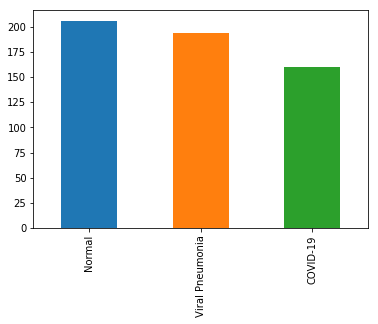

In [29]:
train_df['category'].value_counts().plot.bar()

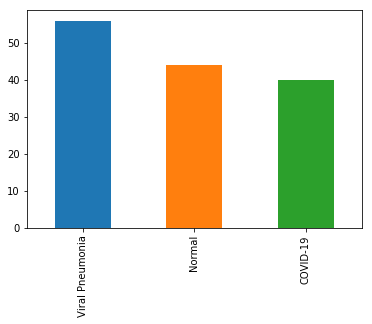

In [30]:
validate_df['category'].value_counts().plot.bar()

In [17]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 5

# Training Generator

In [18]:
train_datagen = ImageDataGenerator (
    
    rotation_range = 15,
    rescale = 1./255,
    
    shear_range = 0.1,
    zoom_range = 0.2,
    
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_generator = train_datagen.flow_from_dataframe (
    
    train_df, 
    path + '\\train', 
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 560 validated image filenames belonging to 3 classes.


# Validation Generator

In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe (
    
    validate_df, 
    path + '\\train', 
    x_col ='filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 140 validated image filenames belonging to 3 classes.


# Visualize Generator 

In [20]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe (
    
    example_df, 
    path + '\\train', 
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical'
)

Found 1 validated image filenames belonging to 1 classes.


          filename category
0  NORMAL (75).png   Normal


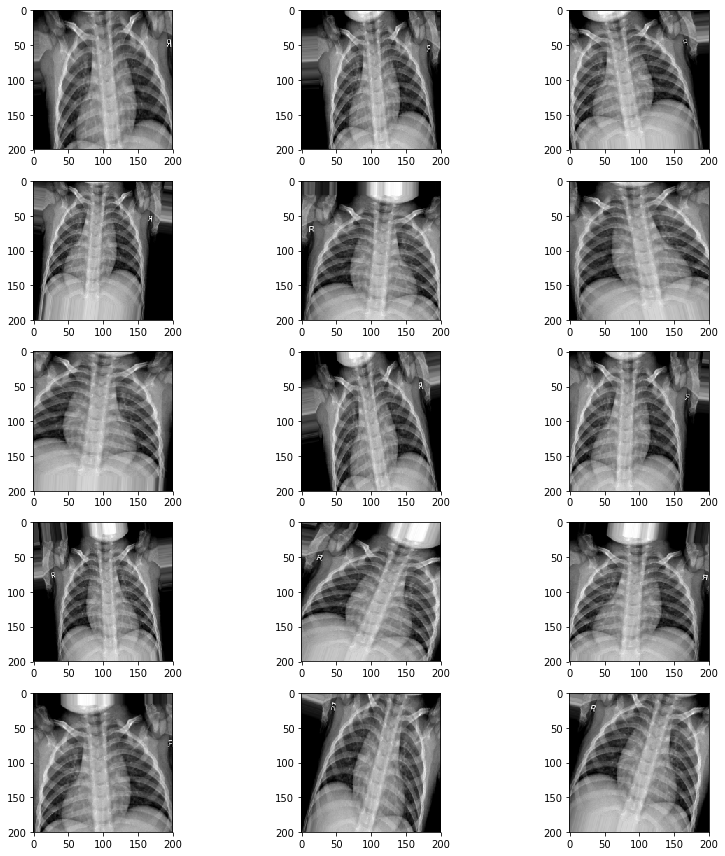

In [21]:
print(example_df)

plt.figure(figsize=(12, 12))

for i in range(0, 15):
    
    plt.subplot(5, 3, i+1)
    
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
        
plt.tight_layout()
plt.show()

In [22]:
epochs = 25

history = model.fit_generator (
    
    train_generator, 
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_train//batch_size,
    callbacks = callbacks
)


Epoch 1/25
112/112 [==============================] - 91s 808ms/step - loss: 1.4888 - accuracy: 0.4893 - val_loss: 2.7013 - val_accuracy: 0.2571
Epoch 2/25
112/112 [==============================] - 87s 778ms/step - loss: 1.1929 - accuracy: 0.5964 - val_loss: 5.6815 - val_accuracy: 0.2643
Epoch 3/25
112/112 [==============================] - 87s 780ms/step - loss: 1.0227 - accuracy: 0.6464 - val_loss: 5.5720 - val_accuracy: 0.3786
Epoch 4/25
112/112 [==============================] - 87s 780ms/step - loss: 0.9327 - accuracy: 0.6893 - val_loss: 4.0426 - val_accuracy: 0.4214
Epoch 5/25
112/112 [==============================] - 92s 823ms/step - loss: 0.8420 - accuracy: 0.6893 - val_loss: 1.9615 - val_accuracy: 0.4571
Epoch 6/25
112/112 [==============================] - 89s 796ms/step - loss: 0.6504 - accuracy: 0.7393 - val_loss: 2.6860 - val_accuracy: 0.3571
Epoch 7/25
112/112 [==============================] - 91s 812ms/step - loss: 0.8248 - accuracy: 0.7125 - val_loss: 2.1498 - val_a

In [23]:
model.save_weights("COVID-Model-{}-{}-{}-{}.h5".format(IMAGE_WIDTH, 3, batch_size, epochs))

# Visualize Training Performance 

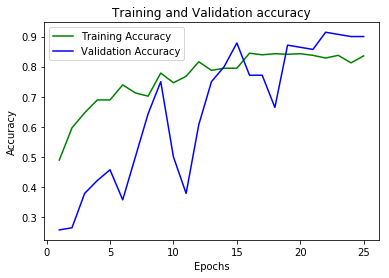

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
numEpochs = range(1,  epochs + 1)
plt.plot(numEpochs, accuracy, 'g', label='Training Accuracy')
plt.plot(numEpochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

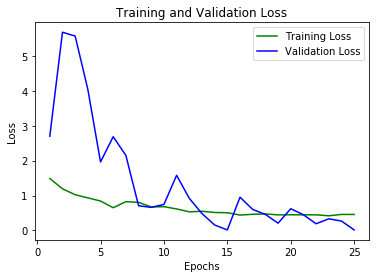

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
numEpochs = range(1,  epochs + 1)
plt.plot(numEpochs, loss, 'g', label='Training Loss')
plt.plot(numEpochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prepare Testing Data

In [33]:
test_filenames = os.listdir(path + 'test')

test_df = pd.DataFrame({
    'filename': test_filenames
})

nb_samples = test_df.shape[0]

In [34]:
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_df

filename
0           COVID-19 (201).jpg
1    Viral Pneumonia (550).png
2    Viral Pneumonia (468).png
3             NORMAL (413).png
4             NORMAL (470).png
..                         ...
684           NORMAL (445).png
685  Viral Pneumonia (395).png
686           NORMAL (398).png
687           NORMAL (496).png
688           NORMAL (463).png

[689 rows x 1 columns]

# Create Testing Generator

In [28]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_dataframe(
    
    test_df, 
    path + '\\test', 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

Found 689 validated image filenames.


# Form Predictions

In [29]:
predict = model.predict_generator(test_generator, steps = np.ceil(nb_samples/batch_size))

## Pick the category that has the highest probability 

In [30]:
test_df['category'] = np.argmax(predict, axis=-1)

In [31]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [32]:
test_df['category'] = test_df['category'].replace({'Normal': 0, 'COVID-19': 1, 'Viral Pneumonia': 2})

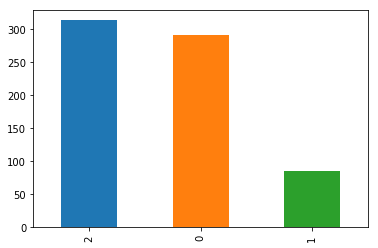

In [33]:
test_df['category'].value_counts().plot.bar()

# Predicted result with images

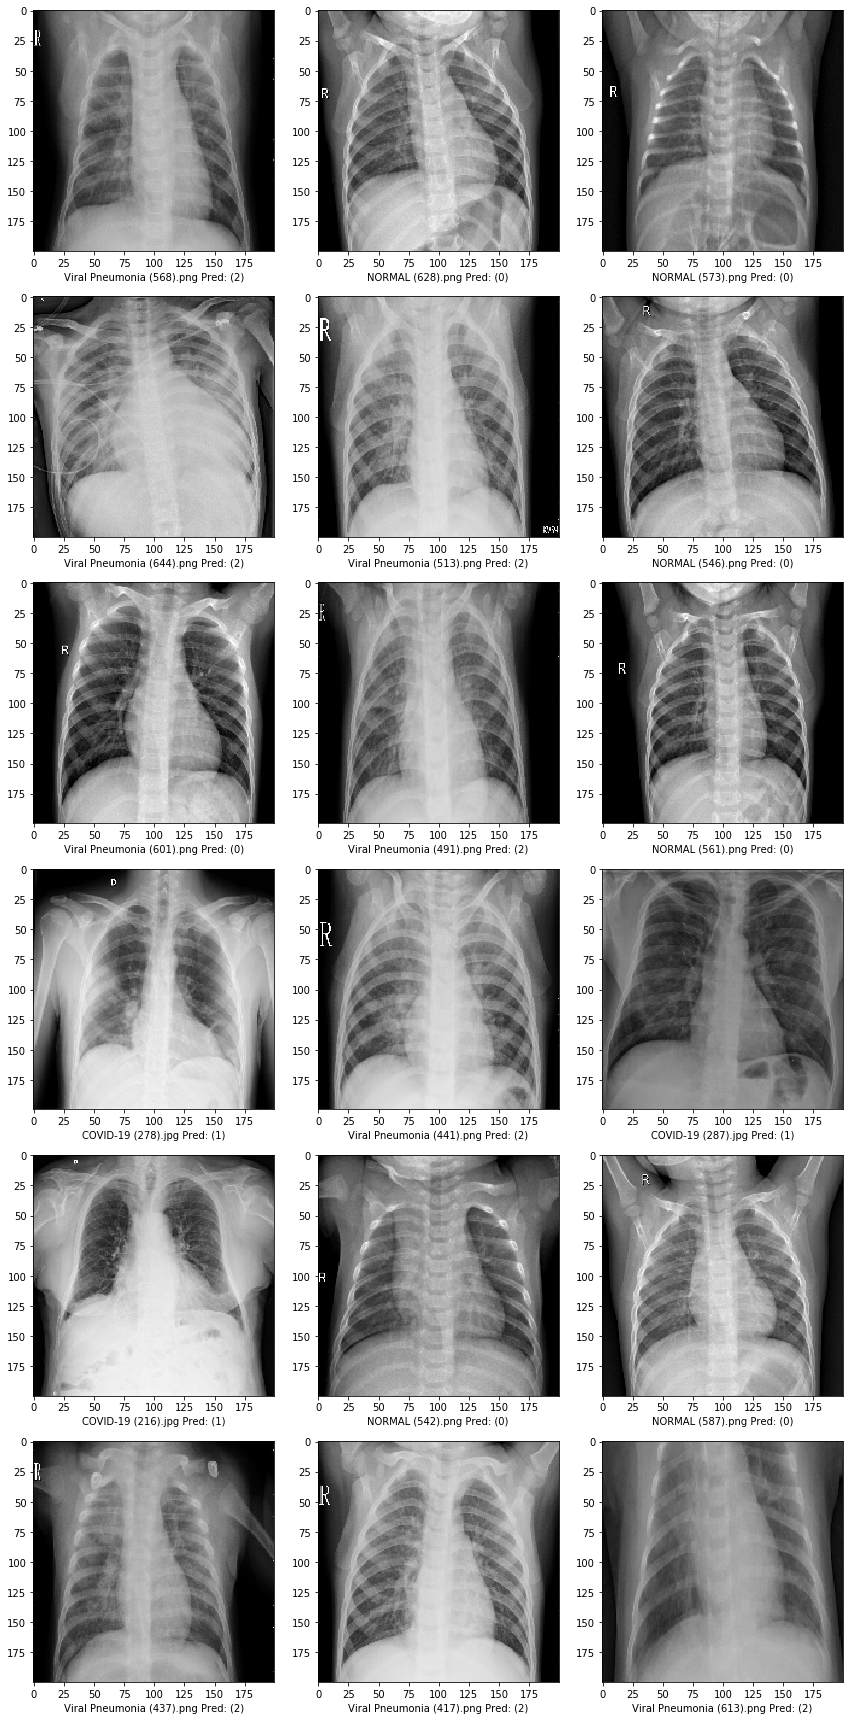

In [34]:
sample_test = test_df.head(18)
sample_test.head()

plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():
    
    filename = row['filename']
    category = row['category']
    
    img = load_img(path + 'test\\' + filename, target_size=IMAGE_SIZE)
    
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + ' Pred: (' + "{}".format(category) + ')' )
    
plt.tight_layout()
plt.show()

# Calculate Model Accuracy

In [35]:
sample_test = test_df
correctPredictions = 0

correctNormalPred = 0
correctCovidPred = 0
correctPneuPred = 0

totalNormalPred = 0
totalCovidPred = 0
totalPneuPred = 0

for index, row in sample_test.iterrows():
    
    filename = row['filename']
    prediction = row['category']
    
    img = load_img(path + 'test\\' + filename, target_size=IMAGE_SIZE)
    
    if 'NORMAL' in filename:
        
        if prediction == 0:
            correctPredictions += 1
            correctNormalPred += 1
            
        totalNormalPred += 1
    
    if 'COVID-19' in filename:
        
        if prediction == 1: 
            correctPredictions += 1
            correctCovidPred += 1
            
        totalCovidPred += 1
    
    if 'Viral Pneumonia' in filename:
        
        if prediction == 2: 
            correctPredictions += 1
            correctPneuPred += 1
            
        totalPneuPred += 1
    

In [36]:
print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
print('COVID-19 Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
print('Viral Pneumonia Predictions:', correctPneuPred, 'Accuracy', "{:.2%}".format(correctPneuPred / totalPneuPred))

Model Accuracy: 93.03%
Correct Predictions: 641 Total Predictions: 689

Normal Predictions: 278 Accuracy 92.67%
COVID-19 Predictions: 79 Accuracy 88.76%
Viral Pneumonia Predictions: 284 Accuracy 94.67%


In [37]:
actual = []
pred = []

for row in test_df.iterrows():
    
    filename = row[1][0]
    
    if 'NORMAL' in filename: actual.append(0)
    if 'COVID-19' in filename: actual.append(1)
    if 'Viral Pneumonia' in filename: actual.append(2)
        
    pred.append(row[1][1])

In [38]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       300
           1       0.93      0.89      0.91        89
           2       0.91      0.95      0.93       300

   micro avg       0.93      0.93      0.93       689
   macro avg       0.93      0.92      0.93       689
weighted avg       0.93      0.93      0.93       689



In [39]:
confusion_matrix(actual, pred)

array([[278,   3,  19],
       [  0,  79,  10],
       [ 13,   3, 284]], dtype=int64)

# Visualizing CNN Model

It is crucial that we visualize what our model is doing – and on what basis it is making its predictions. Saliency maps form a visualization of the pixels in the image that contribute the most to predictions by the model. 

In [5]:
from keras.models import load_model
model.load_weights('COVID-Model-200-3-5-25.h5')

In [75]:
from vis.visualization import visualize_saliency
from vis.utils import utils
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import numpy as np
import cv2
from keras import activations

In [7]:
# Find the index of the to be visualized layer above
layer_index = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_index].activation = activations.linear
model = utils.apply_modifications(model)  

In [15]:
imageAPath = '/Users/faizanahmed/COVID-19 Deep Learning/train/COVID-19 (52).png'
imageA = cv2.imread(imageAPath)
imageA = cv2.resize(imageA, (200, 200)) 

In [31]:
visualization = visualize_saliency(model, layer_index, seed_input=imageA, filter_indices=1)

## Areas of yellow gradient indicate high importance

Text(0.5, 1.0, 'Saliency Map')

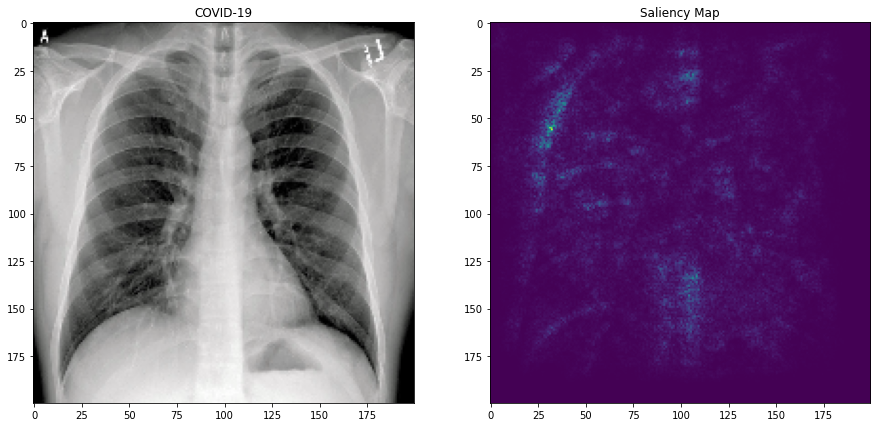

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))
axes[0].imshow(imageA) 
axes[0].set_title('COVID-19')
axes[1].imshow(visualization)
axes[1].set_title('Saliency Map')

## Applying Gaussian Filter 

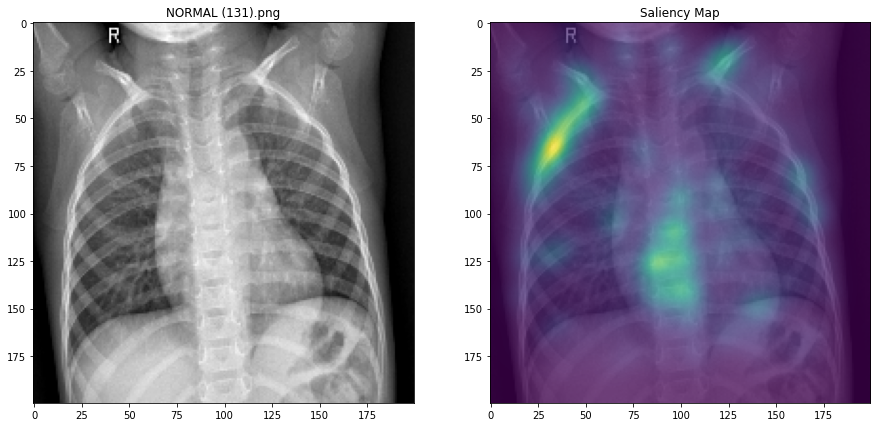

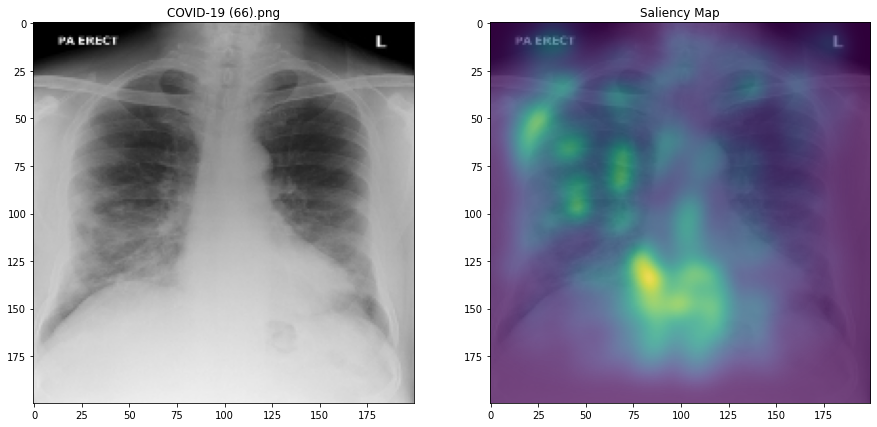

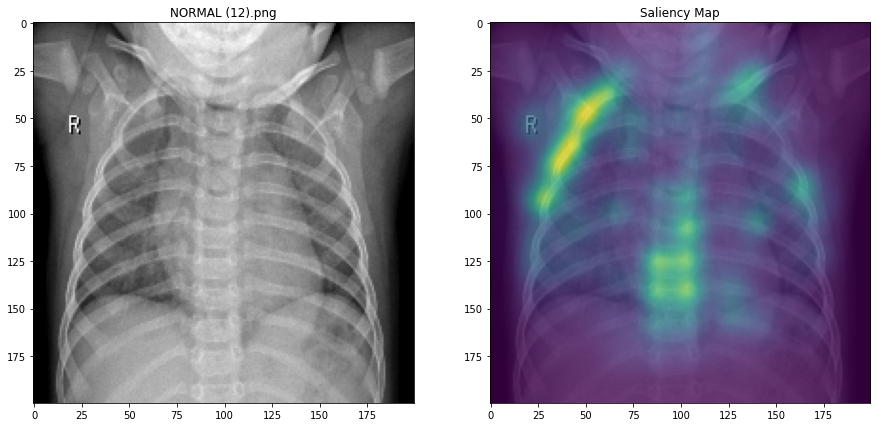

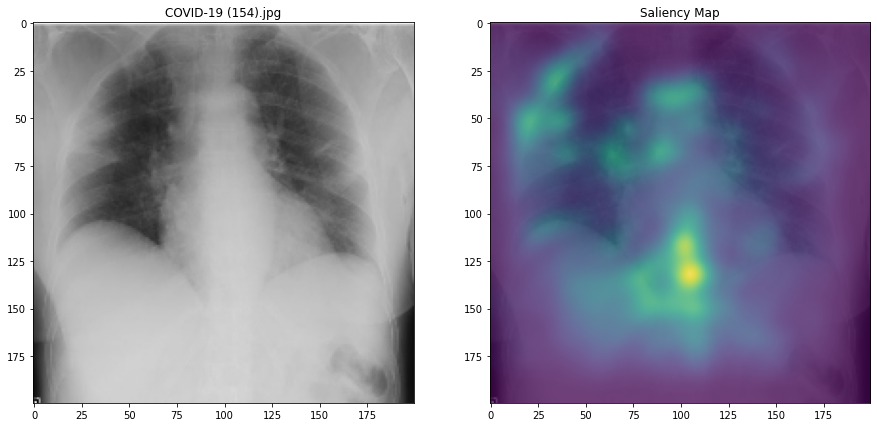

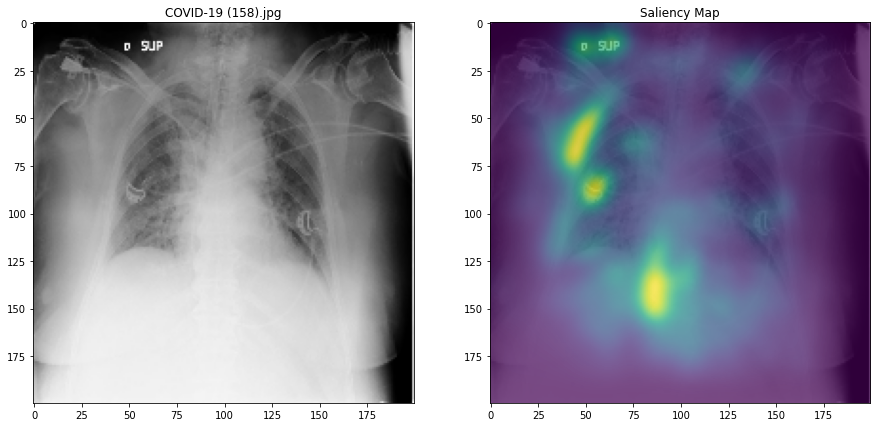

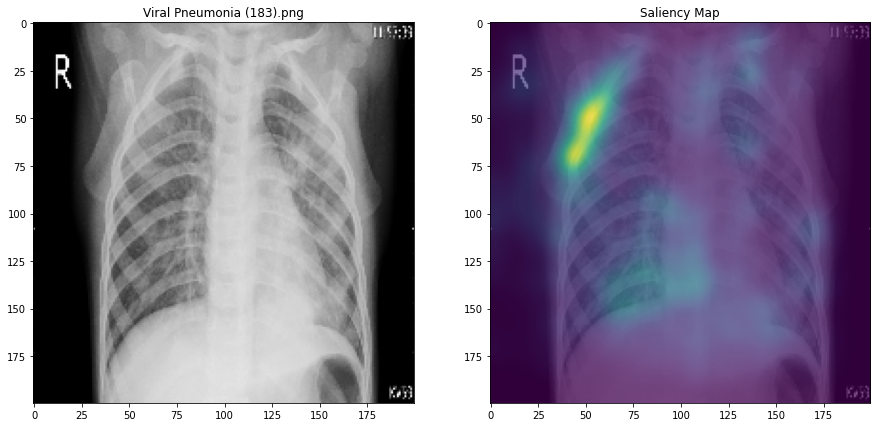

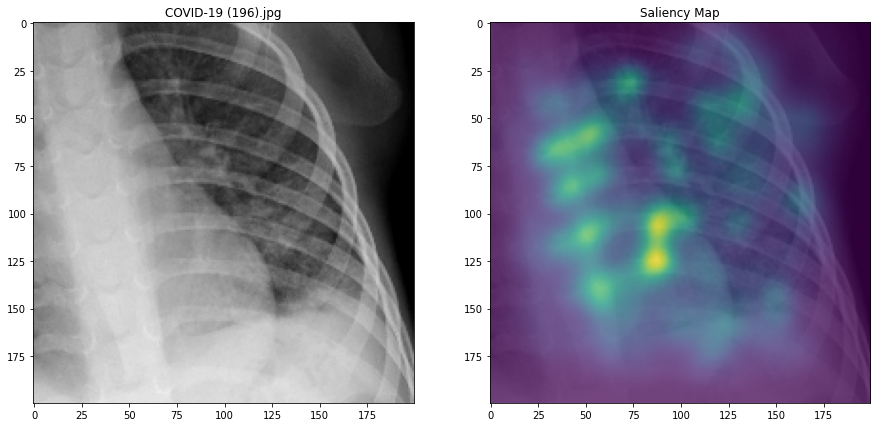

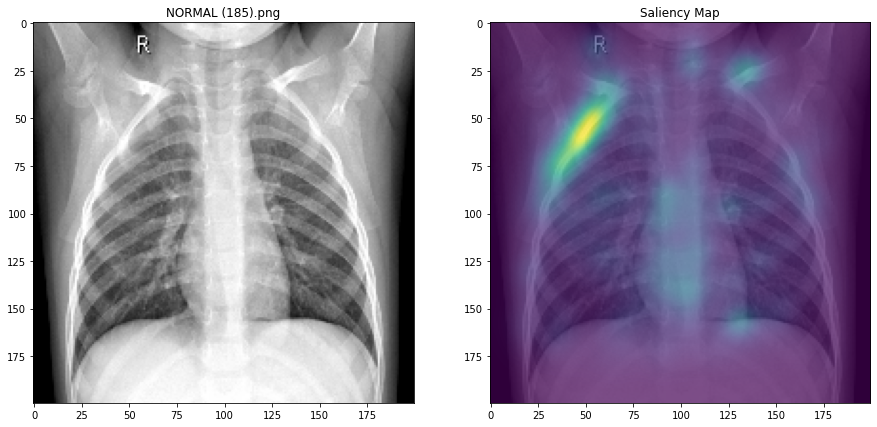

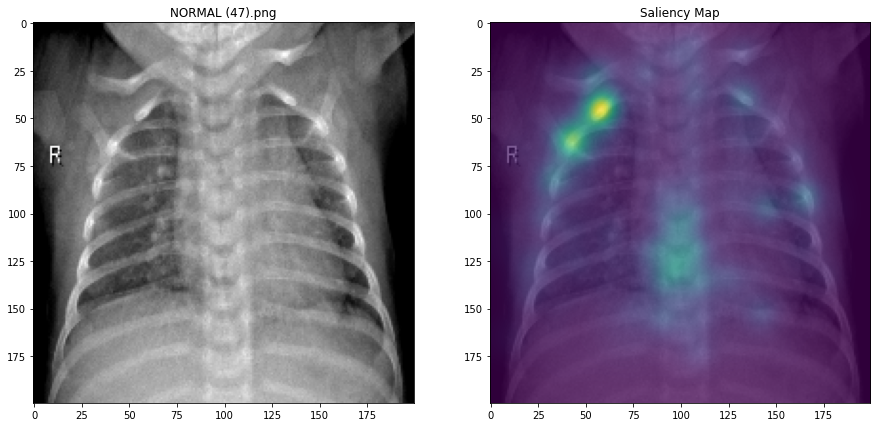

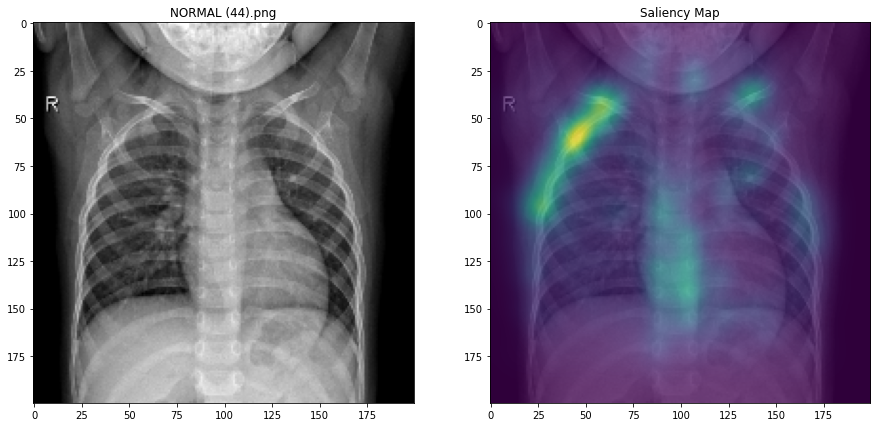

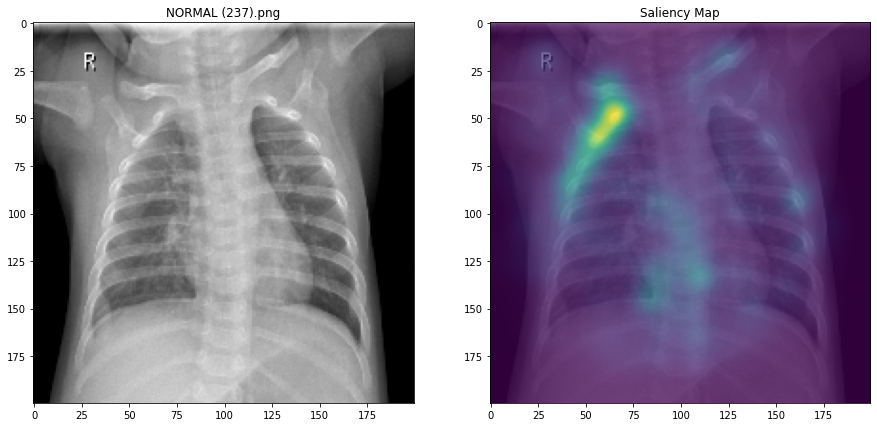

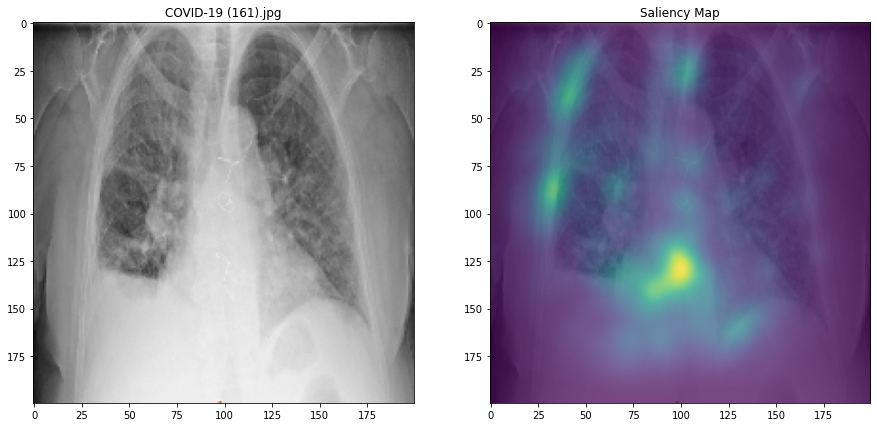

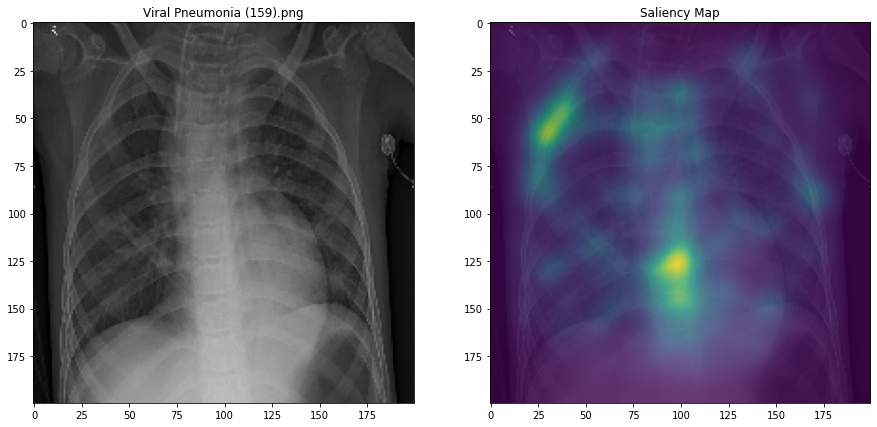

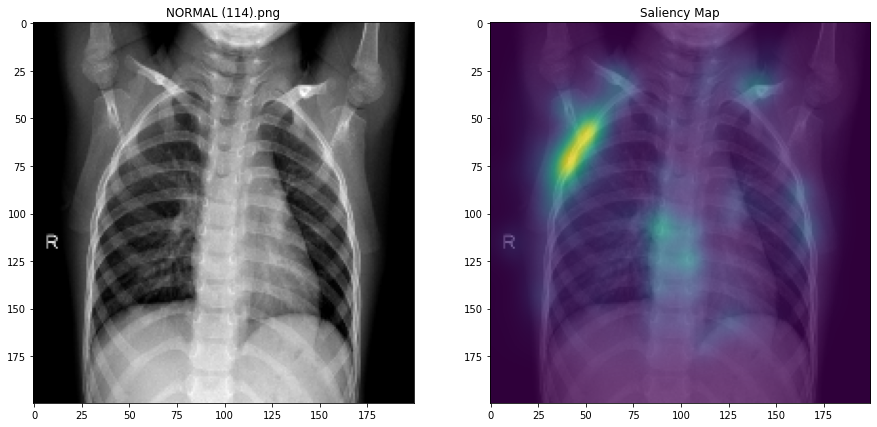

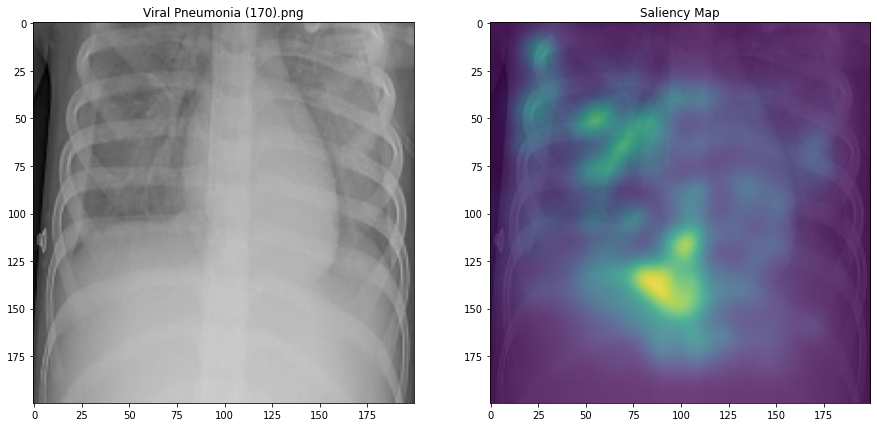

In [94]:
for index, filename in enumerate(train_df.iloc[15 : 30,0]):
    
    image = cv2.imread(path + 'train/' + filename)
    image = cv2.resize(image, (200, 200)) 
    
    category = 0
    if 'COVID-19' in fileName: category = 1
    elif 'Viral Pneumonia' in filename: category = 2
        
    # Generate visualization
    visualization = visualize_saliency(model, layer_index, filter_indices=category, seed_input=image, backprop_modifier=None, grad_modifier="absolute")
    
    gaus = ndimage.gaussian_filter(visualization, sigma=5)

    fig, axes = plt.subplots(1, 2, figsize = (15, 10))
    axes[0].imshow(image) 
    axes[0].set_title(filename)
    axes[1].imshow(image)
    axes[1].imshow(gaus,alpha=.7)
    axes[1].set_title('Saliency Map')
    
    plt.show() 